What are two strategies of classify multi-class data? explain both and their differences.

In the context of multi-class classification, where there are more than two classes to predict, two common strategies are One-vs-One (OvO) and One-vs-Rest (OvR), also known as One-vs-All. These strategies are methods to extend binary classification algorithms that were originally designed for distinguishing between two classes to multi-class problems.

### One-vs-One (OvO)

**How it works**:
- OvO involves training a single classifier per pair of classes. If there are $ N $ classes, you need to train $ N \times (N - 1) / 2 $ classifiers.
- For each classifier, the data from two classes are used as the training set. For example, if you have three classes $ A $, $ B $, and $ C $, you need to train three classifiers: one to distinguish $ A $ from $ B $, one to distinguish $ A $ from $ C $, and one to distinguish $ B $ from $ C $.

**Advantages**:
- Each classifier only needs to learn to distinguish the data from two classes, which can be simpler and more efficient if there are many classes.
- It is effective when the dataset size is small because it reduces the problem to multiple binary classification tasks.

**Disadvantages**:
- The number of classifiers needed grows quadratically with the number of classes, which can be computationally intensive for datasets with a large number of classes.
- It requires more memory and storage due to the larger number of classifiers.

### One-vs-Rest (OvR)

**How it works**:
- OvR involves training one classifier per class. For each classifier, the class it must identify is treated as the positive class, and all other classes are treated as the negative class.
- For example, if you have three classes $ A $, $ B $, and $ C $, you need to train three classifiers: one to distinguish $ A $ from $ B $ and $ C $, one to distinguish $ B $ from $ A $ and $ C $, and one to distinguish $ C $ from $ A $ and $ B $.

**Advantages**:
- The approach is simpler to implement since it only requires as many classifiers as there are classes.
- It is computationally less intensive than OvO, especially as the number of classes increases.

**Disadvantages**:
- The classifiers may be unbalanced if the sizes of the different classes vary significantly.
- The classifier for the 'rest' category has a more complex decision boundary, as it needs to distinguish one class from all others.

### Differences

- **Number of Classifiers**: OvO requires more classifiers than OvR. OvO's number of classifiers can become very large as the number of classes increases, while OvR only needs as many classifiers as there are classes.
- **Computational Complexity**: OvO is more computationally intensive due to the larger number of classifiers.
- **Class Imbalance**: OvR can suffer from class imbalance since each classifier is distinguishing between 'one' and 'all', whereas OvO classifiers are more balanced in terms of the number of instances from each class.
- **Decision Boundary Complexity**: In OvR, individual classifiers may face a complex decision boundary, especially if 'all' encompasses a diverse set of classes.
- **Training Set Size**: OvO classifiers are trained on subsets of the data (only two classes at a time), which might be advantageous for large datasets, but OvR uses all data for each classifier.

The choice between OvO and OvR may depend on the specific characteristics of the dataset and the computational resources available. Some machine learning libraries, like scikit-learn, offer implementations of both strategies and can automatically choose the most suitable one based on the dataset.

# <font color="red">**Question 7**</font>

So you are going to implement a multi-class classification. the one thing you should do is importing <font color="blue">**mobile price**</font> dataset. Target column is **price_range**.

> <font color="orange">**Note:**</font> Your code should be readable and with a lot ot explaination


# Import libraries

you can also import other libraries that you think is needed

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization

# Import dataset

In [ ]:
data = pd.read_csv('./mobile price/train.csv')

# EDA

 we can perform the following steps:
- Data Overview: Understand the basic structure of the dataset, including the number of features, rows, and data types.
- Data Cleaning: Check for and handle missing values, duplicate entries, and data type inconsistencies.
- Exploratory Data Analysis (EDA):
    - Statistical summaries of features.
    - Distribution of features.
    - Correlation between features.
    - Identification of potential outliers.
- Preprocessing:
    - Encoding categorical variables if necessary.
    - Feature scaling and normalization if required.
- Feature Engineering:
    - Creation of second-order features (e.g., polynomial features).
    - Creation of interaction features between variables.
    - Log transformation of features to handle skewness.
- Analysis:
    - Analysis of new features.
    - Uncover underlying structures.
    - Spot anomalies.
    - Check assumptions and develop hypotheses.

### Data Overview

Next, let's move on to data cleaning, which will involve removing the unnecessary index column and checking for any missing values. After that, we'll continue with the EDA and preprocessing steps.​

In [ ]:
data_overview = {
    "Head": data.head(),
    "Shape": data.shape,
    "Data Types": data.dtypes,
    "Describe": data.describe(include='all'),
    "Missing Values": data.isnull().sum(),
    "Duplicate Rows": data.duplicated().sum()
}

In [ ]:
data_overview["Data Types"]

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
data_overview["Describe"]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
data_overview["Missing Values"]

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data_overview["Duplicate Rows"]

0

In [ ]:
for i in range(len(data.columns)):
    print(data.columns[i])
    print(data.iloc[:, i].unique())
    print("-" * 50)
    

battery_power
[ 842 1021  563 ... 1139 1467  858]
--------------------------------------------------
blue
[0 1]
--------------------------------------------------
clock_speed
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
--------------------------------------------------
dual_sim
[0 1]
--------------------------------------------------
fc
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
--------------------------------------------------
four_g
[0 1]
--------------------------------------------------
int_memory
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
--------------------------------------------------
m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
--------------------------------------------------
mobile_wt
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 

In [ ]:
missing_values = data.isnull().sum()
placeholder_check = data.apply(lambda x: (x == ' ?').sum())
data_types = data.dtypes
missing_values, placeholder_check, data_types

(battery_power    0
 blue             0
 clock_speed      0
 dual_sim         0
 fc               0
 four_g           0
 int_memory       0
 m_dep            0
 mobile_wt        0
 n_cores          0
 pc               0
 px_height        0
 px_width         0
 ram              0
 sc_h             0
 sc_w             0
 talk_time        0
 three_g          0
 touch_screen     0
 wifi             0
 price_range      0
 dtype: int64,
 battery_power    0
 blue             0
 clock_speed      0
 dual_sim         0
 fc               0
 four_g           0
 int_memory       0
 m_dep            0
 mobile_wt        0
 n_cores          0
 pc               0
 px_height        0
 px_width         0
 ram              0
 sc_h             0
 sc_w             0
 talk_time        0
 three_g          0
 touch_screen     0
 wifi             0
 price_range      0
 dtype: int64,
 battery_power      int64
 blue               int64
 clock_speed      float64
 dual_sim           int64
 fc                 int64


There are no other missing values in the dataset based on a direct check for nulls. Additionally, there don't appear to be any placeholders that often indicate missing data in categorical variables.

In [ ]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

**The label is balance**. 

With the data cleaning stage addressing missing values complete, we can move on to exploratory data analysis (EDA). This will include examining the statistical summaries of features, distributions, correlations, and potential outliers.

For the EDA, we will:

- Provide statistical summaries for both numerical and categorical features.
- Visualize the distributions of numerical features.
- Examine the relationships between different features.
- Identify any potential outliers using statistical methods.

Let's start by producing statistical summaries for all the features and then proceed with the visual analysis.​

In [ ]:
# Statistical summaries for numerical and categorical features
numerical_summary = data.describe()
numerical_summary

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# Data Visualization

**Corr Heatmap, Histogram...**

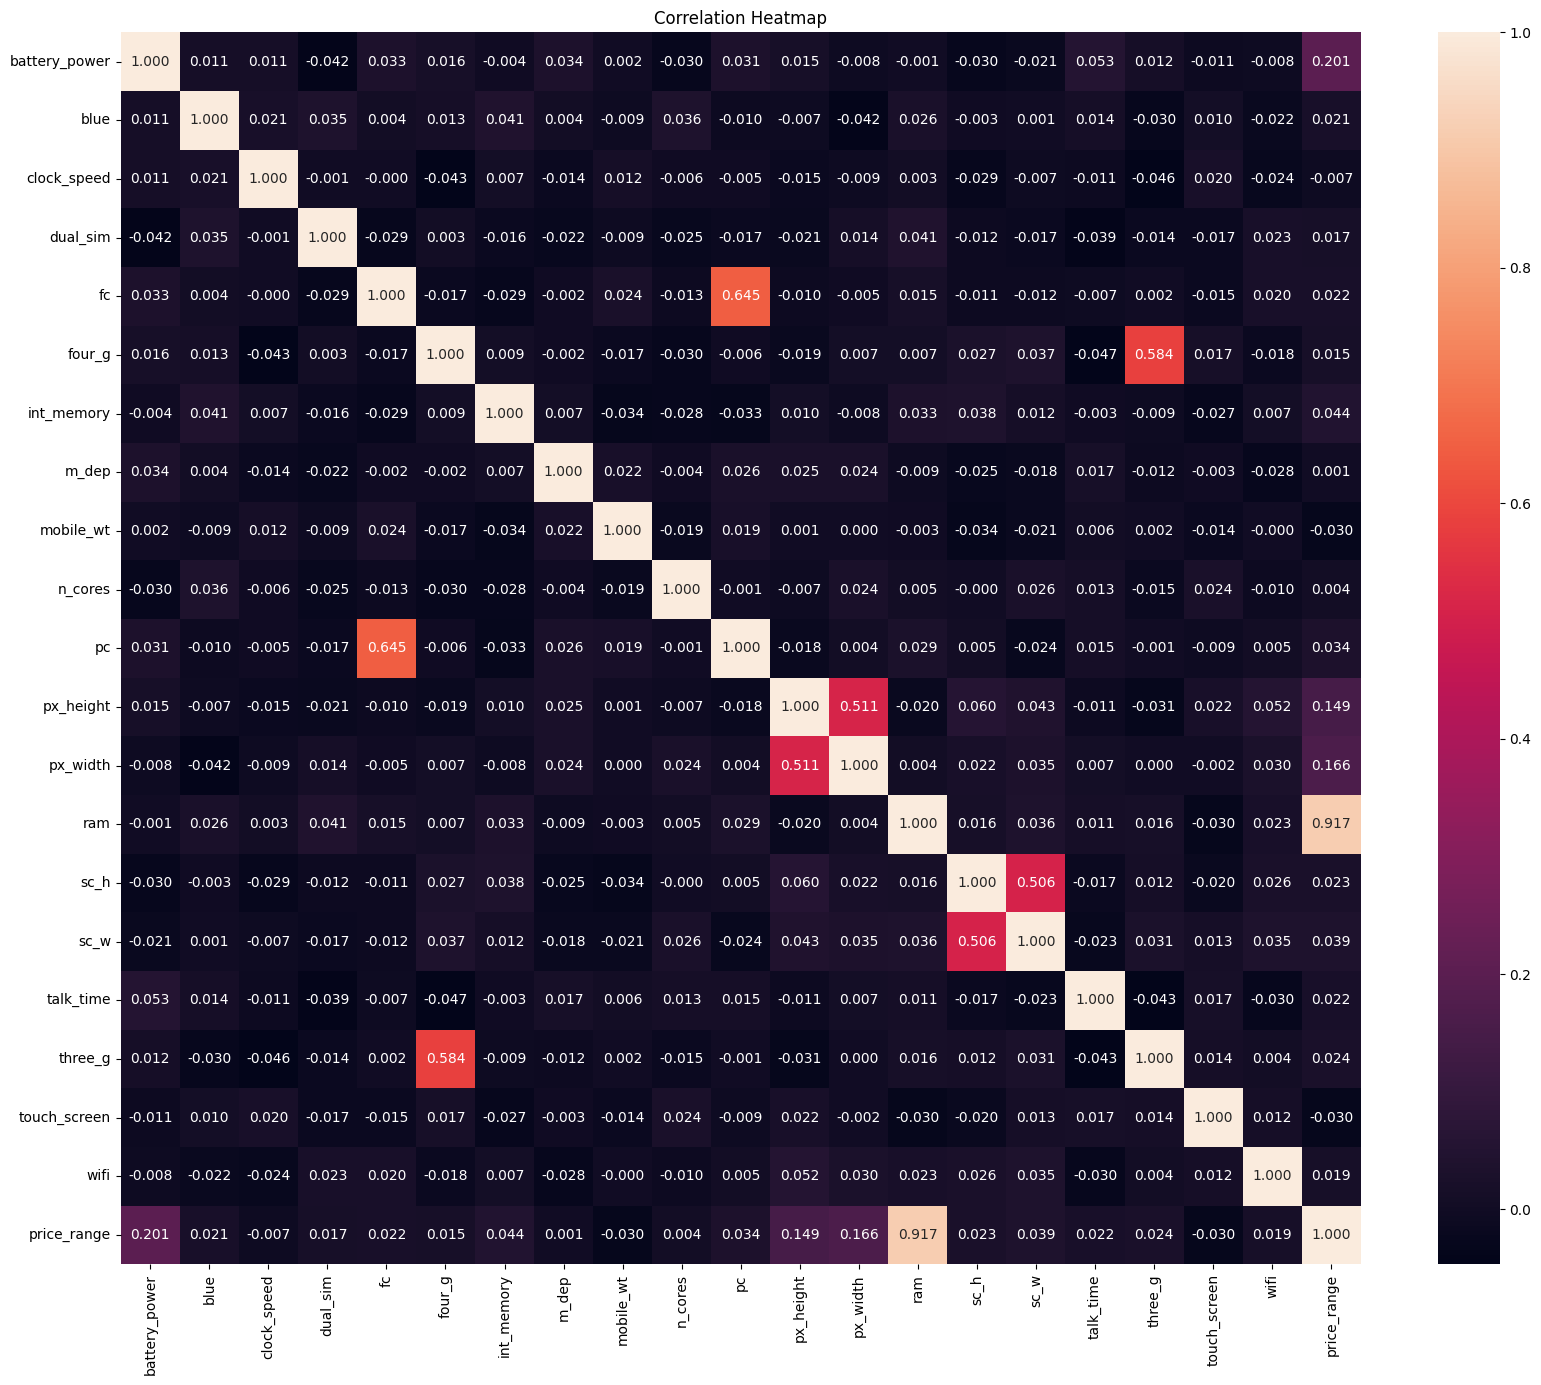

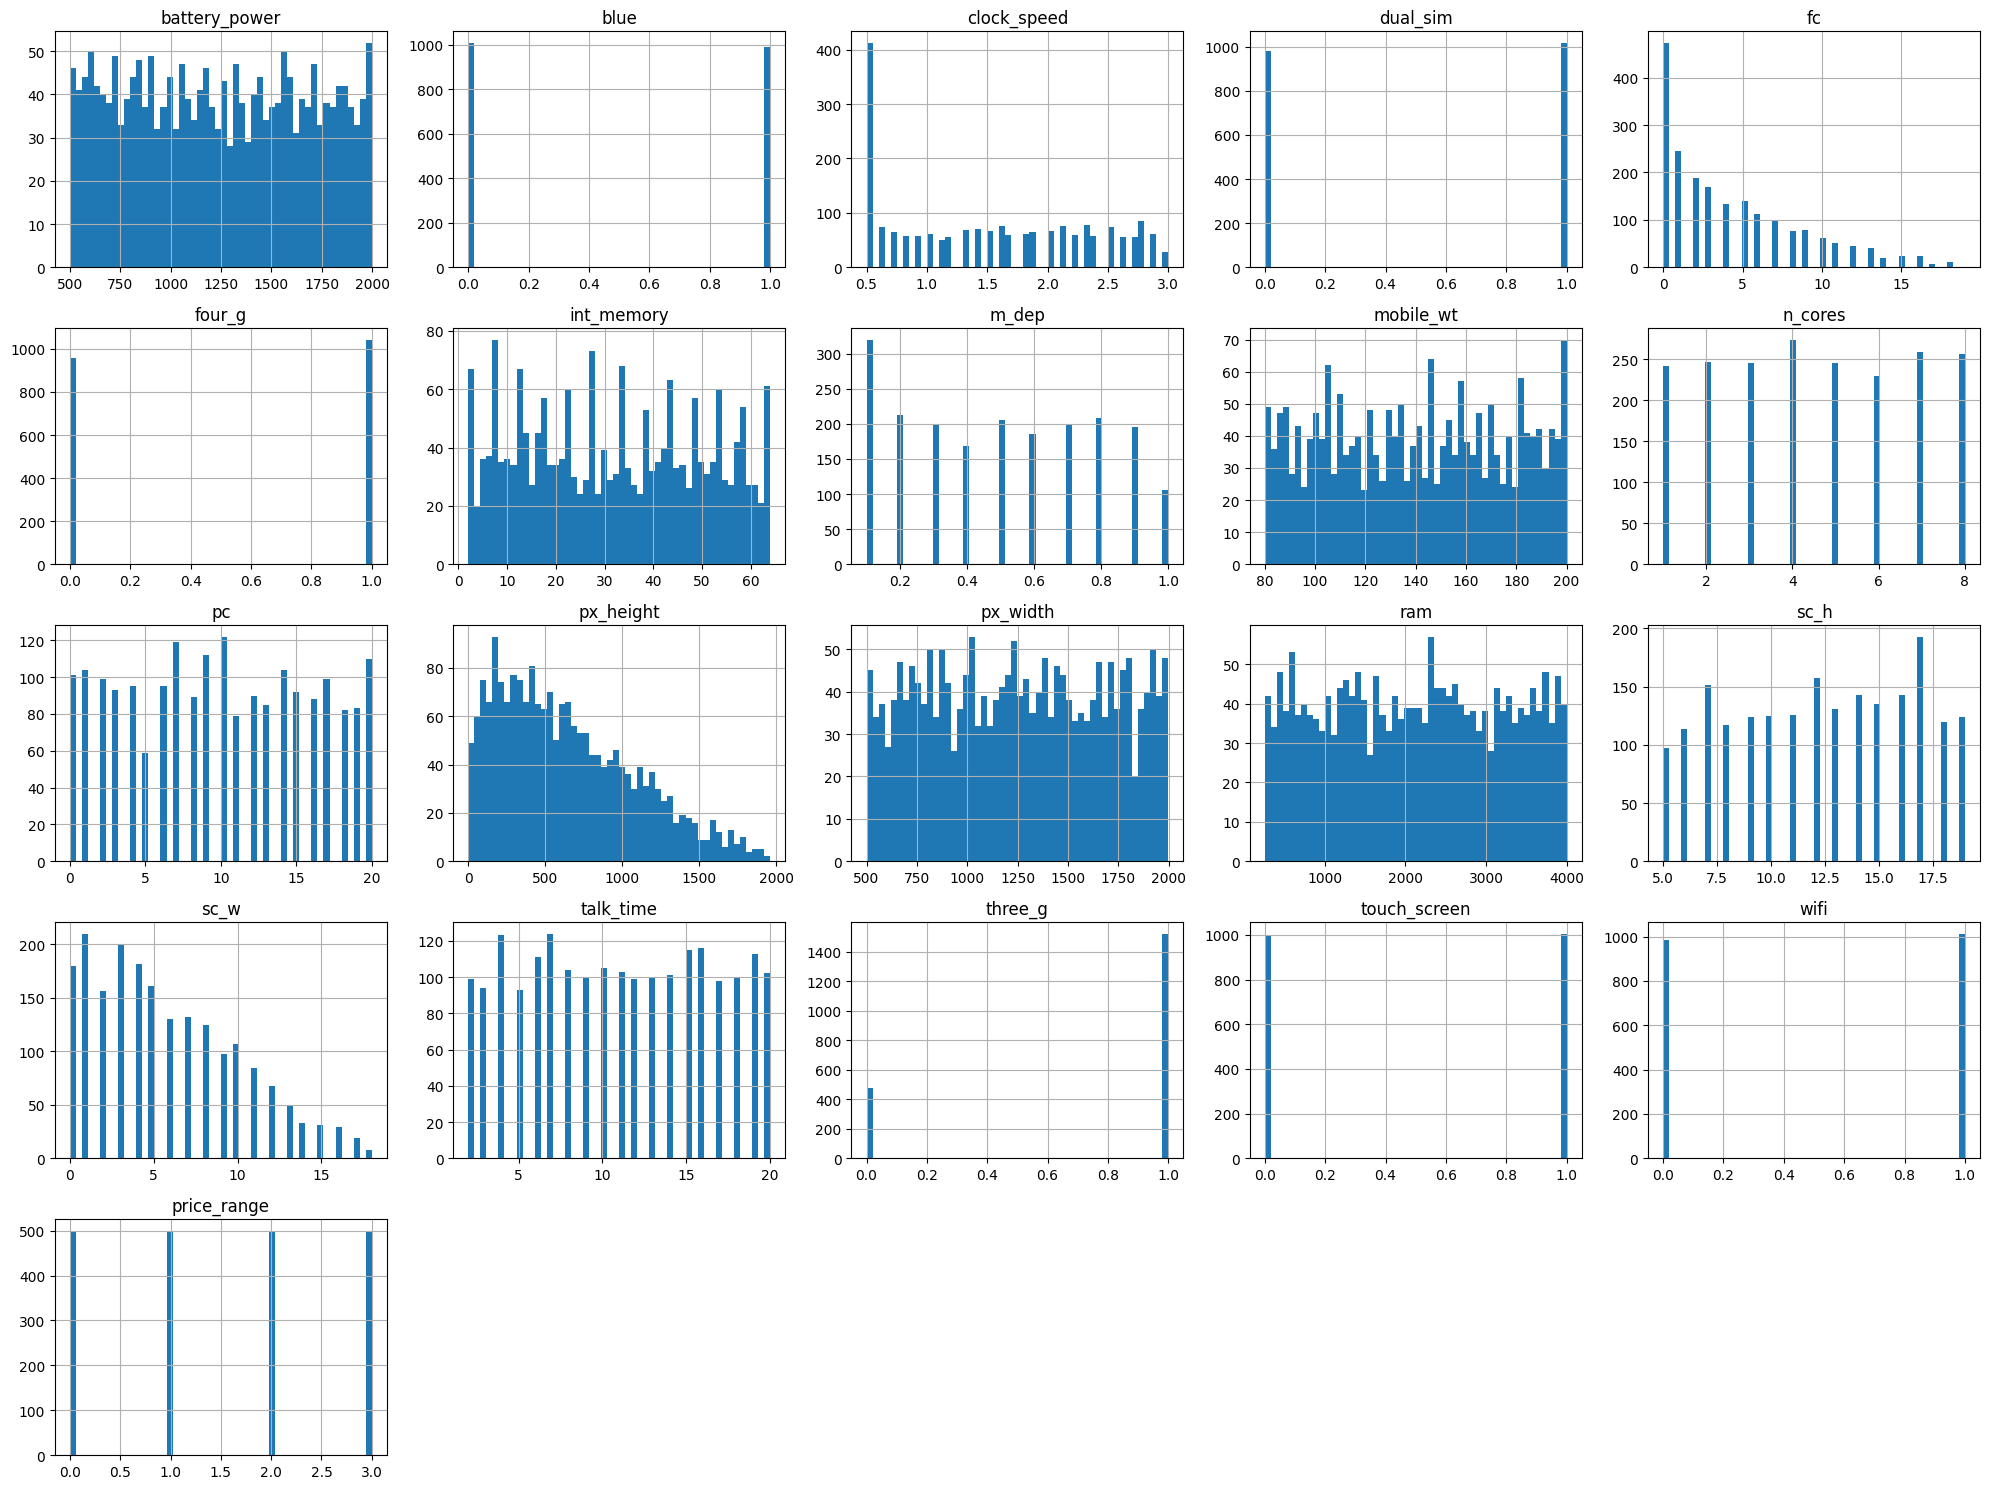

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

# Plot histogram for each feature in the dataset
data.hist(figsize=(20, 15), bins=50)
plt.tight_layout()
plt.show()


The correlation heatmap and histograms for each feature in the dataset have been generated.

### Correlation Heatmap Description:
The heatmap displays the pairwise correlations between the features in the dataset. The color scheme ranges from blue (negative correlation) to red (positive correlation), with the intensity of the color indicating the strength of the correlation. Values close to 1 or -1 indicate a strong positive or negative correlation, respectively, while values close to 0 indicate no correlation. The annotations on the heatmap provide the exact correlation coefficients.

### Histograms Description:
The histograms provide the distribution of values for each feature across the dataset. Each plot represents a single feature, with the x-axis showing the range of values and the y-axis showing the frequency of each value range. The shape of the histograms can give insights into the skewness and kurtosis of the data distributions, potentially indicating the presence of outliers or the need for data normalization.

# Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif

target = 'price_range' if 'price_range' in data.columns else None

if target:
    features = data.drop(columns=[target])
    mi_scores = mutual_info_classif(features, data[target], discrete_features='auto')

    mi_scores_df = pd.DataFrame(mi_scores, index=features.columns, columns=['MI Scores']).sort_values(by='MI Scores', ascending=False)
else:
    mi_scores_df = pd.DataFrame({'Error': ['Target column not found']})

mi_scores_df

,MI Scores
ram,0.846393
clock_speed,0.033510
px_width,0.033309
px_height,0.032074
battery_power,0.025620
mobile_wt,0.021528
three_g,0.015544
four_g,0.009676
blue,0.008265
touch_screen,0.006870


The mutual information scores between the features and the target column 'price_range' have been computed. The scores are as follows, with higher scores indicating a stronger relationship with the target:

- `ram` has the highest mutual information score with the target, suggesting that it is the most informative feature for predicting the price range.
- `sc_h` (screen height), `battery_power`, `px_width` (pixel width), and `px_height` (pixel height) also have some mutual information with the target, but significantly less than `ram`.
- Other features like `pc` (primary camera megapixels), `int_memory` (internal memory), `wifi`, `sc_w` (screen width), `mobile_wt` (mobile weight), and `blue` (Bluetooth) have low but non-zero mutual information scores.
- Features such as `m_dep`, `n_cores`, `four_g`, `fc` (front camera), `dual_sim`, `clock_speed`, `talk_time`, `three_g`, and `touch_screen` have zero mutual information score with the target in this dataset, indicating that they are not informative for predicting the 'price_range'.

This analysis suggests that features related to RAM and screen dimensions are the most important for predicting the price range of the devices in this dataset.

# Feature Scaling

Three common types of feature scaling are:

- **Standard Scaling (Z-score normalization)**: This rescales the feature to have a mean (μ) of 0 and standard deviation (σ) of 1. The standard score of a sample $ x $ is calculated as $ z = \frac{(x - \mu)}{\sigma} $.

- **MinMax Scaling**: This rescales the feature to a fixed range, usually 0 to 1. The transformation is given by $ X_{std} = \frac{(X - X_{min})}{(X_{max} - X_{min})} $, and then $ X_{scaled} = X_{std} \times (max - min) + min $.

- **Robust Scaling**: This method scales features using statistics that are robust to outliers. It removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def scale_features(data, numerical_cols, scale_type='standard'):
    scaled_data = data.copy()
    
    if scale_type == 'standard':
        scaler = StandardScaler()
    elif scale_type == 'minmax':
        scaler = MinMaxScaler()
    elif scale_type == 'robust':
        scaler = RobustScaler()
    else:
        raise ValueError("`scale_type` should be 'standard', 'minmax', or 'robust'.")

    # Fit and transform the numerical features
    scaled_data[numerical_cols] = scaler.fit_transform(scaled_data[numerical_cols])
    
    return scaled_data

# Choose 'standard', 'minmax', or 'robust' for the scale_type parameter
data_scaled = scale_features(
    data,
    numerical_cols=data.drop(['price_range'], axis=1).columns, 
    scale_type='minmax'
)

In [ ]:
processed_data = data_scaled

In [ ]:
processed_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,...,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,...,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,2
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,...,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,3
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,...,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0


#### Declare feature vector and target variable target value is income

In [ ]:
y_column = 'price_range'
y = processed_data[y_column]
X = processed_data.drop([y_column], axis=1, )
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.000000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.000000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.052632,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.210526,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


# Split Data into Separate Training and Validation Set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

To train several models and evaluate their performance on both training and validation datasets, you need to follow these steps:

1. Preprocess the data: Handle missing values, encode categorical variables, and scale numerical features if necessary.
2. Split the data into training and validation sets.
3. Initialize the machine learning models you want to train. **(According to model complexity)**
4. Train each model on the training set.
5. Make predictions on both the training set and the validation set.
6. Evaluate the models using various performance metrics.

- Naive Bayes.
- Random Forest.
- k-Nearest Neighbors.

# Init WandB

In [ ]:
# !pip install wandb
!wandb login

wandb: Currently logged in as: samousavizade. Use `wandb login --relogin` to force relogin


In [ ]:
import wandb

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="PhonePriceRangeClassification",
    entity="samousavizade",
    name="Arbitrary Config",
    # track hyperparameters and run metadata
    config={}
)


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: samousavizade. Use `wandb login --relogin` to force relogin


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix
import wandb
from tqdm.notebook import tqdm

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn.discriminant_analysis')
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

models = {
    'NB':GaussianNB(),
    'RandomForest':RandomForestClassifier(),
    'KNN': KNeighborsClassifier(), 
}

for name, model in (models.items()):
    print(f"Model {name} ...")
    # Train the model
    tqdm(model.fit(X_train, y_train))
    
    # Make predictions
    train_predictions = model.predict(X_train)
    validation_predictions = model.predict(X_validation)
        
    wandb.log({
            f"Model {name} Train Confusion Matrix": 
            wandb.plot.confusion_matrix(
            probs=None,
            y_true=y_train.tolist(), 
            preds=train_predictions.tolist(),
            class_names=[0, 1, 2, 3],
            )}
        )

    wandb.log({
        f"Model {name} Validation Confusion Matrix": 
        wandb.plot.confusion_matrix(
        probs=None,
        y_true=y_validation.tolist(), 
        preds=validation_predictions.tolist(),
        class_names=[0, 1, 2, 3],
        )}
    )
    
    report = classification_report(y_validation, validation_predictions, output_dict=True)
    print(report)
    print("-" * 50)
    wandb.log({f"Model {name} Classification Report": report})


Model NB ...


0it [00:00, ?it/s]

{'0': {'precision': 0.9047619047619048, 'recall': 0.9047619047619048, 'f1-score': 0.9047619047619048, 'support': 105}, '1': {'precision': 0.7654320987654321, 'recall': 0.6813186813186813, 'f1-score': 0.7209302325581395, 'support': 91}, '2': {'precision': 0.6396396396396397, 'recall': 0.7717391304347826, 'f1-score': 0.6995073891625616, 'support': 92}, '3': {'precision': 0.883495145631068, 'recall': 0.8125, 'f1-score': 0.8465116279069768, 'support': 112}, 'accuracy': 0.7975, 'macro avg': {'precision': 0.7983321971995111, 'recall': 0.7925799291288422, 'f1-score': 0.7929277885973955, 'support': 400}, 'weighted avg': {'precision': 0.8061315603629521, 'recall': 0.7975, 'f1-score': 0.7994215832283195, 'support': 400}}
--------------------------------------------------
Model RandomForest ...


  0%|          | 0/100 [00:00<?, ?it/s]

{'0': {'precision': 0.9439252336448598, 'recall': 0.9619047619047619, 'f1-score': 0.9528301886792454, 'support': 105}, '1': {'precision': 0.8494623655913979, 'recall': 0.8681318681318682, 'f1-score': 0.858695652173913, 'support': 91}, '2': {'precision': 0.78125, 'recall': 0.8152173913043478, 'f1-score': 0.797872340425532, 'support': 92}, '3': {'precision': 0.9326923076923077, 'recall': 0.8660714285714286, 'f1-score': 0.8981481481481481, 'support': 112}, 'accuracy': 0.88, 'macro avg': {'precision': 0.8768324767321414, 'recall': 0.8778313624781016, 'f1-score': 0.8768865823567096, 'support': 400}, 'weighted avg': {'precision': 0.8818744081576648, 'recall': 0.88, 'f1-score': 0.8804633051772209, 'support': 400}}
--------------------------------------------------
Model KNN ...


0it [00:00, ?it/s]

{'0': {'precision': 0.5663716814159292, 'recall': 0.6095238095238096, 'f1-score': 0.5871559633027523, 'support': 105}, '1': {'precision': 0.3, 'recall': 0.3626373626373626, 'f1-score': 0.32835820895522383, 'support': 91}, '2': {'precision': 0.2711864406779661, 'recall': 0.34782608695652173, 'f1-score': 0.3047619047619048, 'support': 92}, '3': {'precision': 0.6440677966101694, 'recall': 0.3392857142857143, 'f1-score': 0.4444444444444445, 'support': 112}, 'accuracy': 0.4175, 'macro avg': {'precision': 0.4454064796760162, 'recall': 0.41481824335085205, 'f1-score': 0.4161801303660813, 'support': 400}, 'weighted avg': {'precision': 0.45963443077846106, 'recall': 0.4175, 'f1-score': 0.42336961544396845, 'support': 400}}
--------------------------------------------------


# Analyze Confusion Matrix, Recall, Accuracy, Precision

**Confusion matrix heatmap are logged to wandb.**

# Results and Conclusion

### Naive Bayes (NB)
**What was done:** Applied the Naive Bayes algorithm, known for its simplicity and efficiency, especially in text classification and with an assumption of feature independence.

**What was found:** The NB model showed a decent overall accuracy of 79.75%. It demonstrated high precision and recall in class '0' and '3', but relatively lower performance in class '2'. The results suggest NB's effectiveness in certain classes while struggling in others, potentially due to the violation of the feature independence assumption or class imbalance.

### Random Forest
**What was done:** Utilized the Random Forest model, an ensemble learning method known for its high accuracy, robustness, and ability to handle large datasets with higher dimensionality.

**What was found:** Random Forest achieved an impressive accuracy of 88%, outperforming NB in all classes. It showed particularly strong performance in class '0' and '3', with high precision and recall. The model's ability to handle the complexity and variability of the data was evident, making it a robust choice for diverse datasets.

### K-Nearest Neighbors (KNN)
**What was done:** KNN was implemented to classify instances based on the closest training examples in the feature space. The model's simplicity and effectiveness in classification tasks where the decision boundary is not linear were key considerations.

**What was found:** KNN exhibited a lower overall accuracy of 41.75%, indicating challenges in capturing the underlying patterns in the dataset. All classes showed relatively low precision and recall, suggesting that the chosen 'k' value or the feature space's dimensionality might not have been optimal for this specific dataset.

### Conclusion
Each model displayed unique strengths and limitations, influenced by their inherent characteristics and assumptions. NB's simplicity worked well in certain classes but showed limitations in others. Random Forest's ensemble approach provided high accuracy and robustness across all classes, demonstrating its efficacy in handling complex datasets. KNN's performance was suboptimal, likely due to the choice of 'k' or the nature of the dataset, emphasizing the importance of parameter tuning and feature selection in KNN.

---